In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#function to load data, resize image, normalize arrays 
def load_dataset(directory, target_size=(150, 150)):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        class_label = 1 if class_name == 'uninfected' else 0
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(class_label)
    return np.array(images), np.array(labels)


In [7]:
# Set the path to your training directory
train_dir = r'C:\Users\OMEN\Malaria_Project\notebook\data\Train'

In [8]:
print(train_dir)

C:\Users\OMEN\Malaria_Project\notebook\data\Train


In [9]:
# Load the dataset
X, y = load_dataset(train_dir)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Check the distribution of classes in both sets
print("Training set class distribution:")
print("Uninfected:", np.sum(y_train == 1), "Infected:", np.sum(y_train == 0))
print("Validation set class distribution:")
print("Uninfected:", np.sum(y_val == 1), "Infected:", np.sum(y_val == 0))

Training set shape: (1278, 150, 150, 3)
Validation set shape: (320, 150, 150, 3)
Training set class distribution:
Uninfected: 162 Infected: 1116
Validation set class distribution:
Uninfected: 34 Infected: 286


In [12]:
# create CNN model layer 
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    # compile the model 
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Create the model
model = create_model()

c:\Users\OMEN\Malaria_Project\new_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # You can adjust this
    batch_size=32,
    validation_data=(X_val, y_val)
    )

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.8303 - loss: 2.7091 - val_accuracy: 0.8938 - val_loss: 2.0824
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.8756 - loss: 1.9912 - val_accuracy: 0.8938 - val_loss: 1.6021
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.8798 - loss: 1.5507 - val_accuracy: 0.8938 - val_loss: 1.3390
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.8792 - loss: 1.3150 - val_accuracy: 0.9031 - val_loss: 1.1729
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.9028 - loss: 1.1499 - val_accuracy: 0.9094 - val_loss: 1.0534
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.8982 - loss: 1.0448 - val_accuracy: 0.9156 - val_loss: 0.9628
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9046 - loss: 0.9599 - val_accuracy: 0.9000 - val_loss: 0.8893
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.8956 - loss: 0.8909 - 

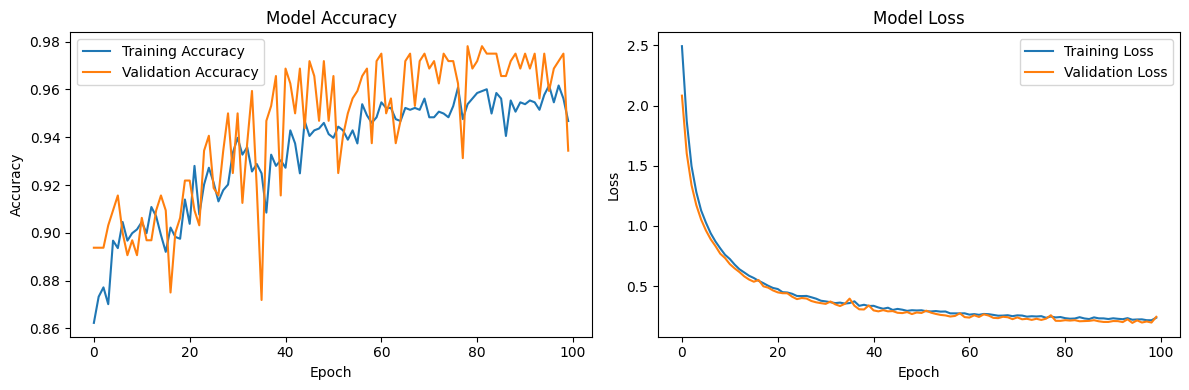

In [15]:
def plot_accuracy(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# After training your model
plot_accuracy(history)

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

# Path to your test directory
dir_path = r'C:\Users\OMEN\Malaria_Project\notebook\data\Test'

# Function to predict and display results
def predict_and_display(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    if val[0][0] > 0.5:  # Assuming 0.5 as the threshold
        print("uninfected")
    else:
        print("infected")

    return val[0][0]

# Get list of all images and randomly select 50
all_images = os.listdir(dir_path)
selected_images = random.sample(all_images, min(50, len(all_images)))

# Process 50 randomly selected images
results = []
for i in selected_images:
    img_path = os.path.join(dir_path, i)
    print(f"\nProcessing image: {i}")
    probability = predict_and_display(model, img_path)
    results.append({'image': i, 'probability': probability})

# Display summary of results
print("\nSummary of Results:")
for result in results:
    print(f"Image: {result['image']}, Probability of being uninfected: {result['probability']:.4f}")

# Calculate overall statistics
infected_count = sum(1 for result in results if result['probability'] <= 0.5)
uninfected_count = len(results) - infected_count

print(f"\nTotal images processed: {len(results)}")
print(f"Classified as infected: {infected_count}")
print(f"Classified as uninfected: {uninfected_count}")
print(f"Accuracy on this set: {infected_count/len(results):.2%}")  # Assuming all images in this directory are actually infected


Processing image: plasmodium-phone-0451.jpg


NameError: name 'model' is not defined